# models comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit


# BIC and mcFadden_R2
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

In [2]:
output_dir = r"26_RL_agent_TDlearn_output_model_comparison"
os.makedirs(output_dir, exist_ok=True)

# first half train second half test
file_see_colors = "16_RL_agent_TDlearn_output/models_evaluation.csv"
file_see_numbers = "17_RL_agent_TDlearn_output/models_evaluation.csv"
file_see_colors_and_numbers = "18_RL_agent_TDlearn_output/models_evaluation.csv"


# second half train first half test
file_see_colors_2 = "21_RL_agent_TDlearn_output/models_evaluation.csv"
file_see_numbers_2 = "22_RL_agent_TDlearn_output/models_evaluation.csv"
file_see_colors_and_numbers_2 = "23_RL_agent_TDlearn_output/models_evaluation.csv"


df_see_colors = pd.read_csv(file_see_colors)
df_see_numbers = pd.read_csv(file_see_numbers)
df_see_colors_and_numbers = pd.read_csv(file_see_colors_and_numbers)


df_see_colors_2 = pd.read_csv(file_see_colors_2)
df_see_numbers_2 = pd.read_csv(file_see_numbers_2)
df_see_colors_and_numbers_2 = pd.read_csv(file_see_colors_and_numbers_2)

# accuracies

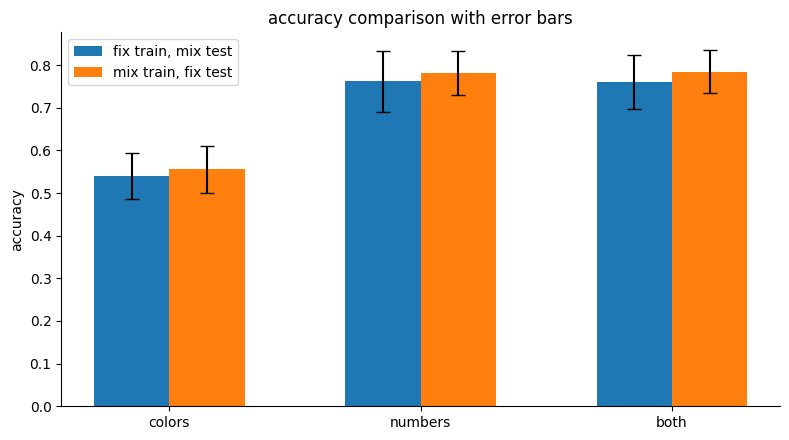

In [3]:
acc_see_colors = df_see_colors["accuracy"]
acc_see_numbers = df_see_numbers["accuracy"]
acc_sees_colors_and_numbers = df_see_colors_and_numbers["accuracy"]

acc_see_colors_2 = df_see_colors_2["accuracy"]
acc_see_numbers_2 = df_see_numbers_2["accuracy"]
acc_sees_colors_and_numbers_2 = df_see_colors_and_numbers_2["accuracy"]

means = [
    np.mean(acc_see_colors), np.mean(acc_see_colors_2),
    np.mean(acc_see_numbers), np.mean(acc_see_numbers_2),
    np.mean(acc_sees_colors_and_numbers), np.mean(acc_sees_colors_and_numbers_2)
]

std_devs = [
    np.std(acc_see_colors), np.std(acc_see_colors_2),
    np.std(acc_see_numbers), np.std(acc_see_numbers_2),
    np.std(acc_sees_colors_and_numbers), np.std(acc_sees_colors_and_numbers_2)
]

categories = ["colors", "numbers", "both"]
x = np.arange(len(categories))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width/2, means[::2], yerr=std_devs[::2], width=width, label="fix train, mix test", capsize=5)
ax.bar(x + width/2, means[1::2], yerr=std_devs[1::2], width=width, label="mix train, fix test", capsize=5)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel("accuracy")
ax.set_title("accuracy comparison with error bars")
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison_accuracies.pdf")
plt.savefig(filename, format='pdf')


plt.show()


# BIC and R2 calculations

In [4]:
bic_see_colors = df_see_colors["BIC"]
bic_see_numbers = df_see_numbers["BIC"]
bic_sees_colors_and_numbers = df_see_colors_and_numbers["BIC"]


bic_see_colors_2 = df_see_colors_2["BIC"]
bic_see_numbers_2 = df_see_numbers_2["BIC"]
bic_sees_colors_and_numbers_2 = df_see_colors_and_numbers_2["BIC"]

mcFadden_r2_see_colors = df_see_colors["mcFadden_r2"]
mcFadden_r2_see_numbers = df_see_numbers["mcFadden_r2"]
mcFadden_r2_sees_colors_and_numbers = df_see_colors_and_numbers["mcFadden_r2"]

mcFadden_r2_see_colors_2 = df_see_colors_2["mcFadden_r2"]
mcFadden_r2_see_numbers_2 = df_see_numbers_2["mcFadden_r2"]
mcFadden_r2_sees_colors_and_numbers_2 = df_see_colors_and_numbers_2["mcFadden_r2"]



delta_bic_colors_fix_train_mix_test = bic_see_colors - bic_see_colors_2
delta_bic_numbers_fix_train_mix_test = bic_see_numbers - bic_see_numbers_2
delta_bic_colors_and_numbers_fix_train_mix_test = bic_sees_colors_and_numbers - bic_sees_colors_and_numbers_2

delta_mcFadden_r2_colors_fix_train_mix_test = mcFadden_r2_see_colors - mcFadden_r2_see_colors_2
delta_mcFadden_r2_numbers_fix_train_mix_test = mcFadden_r2_see_numbers - mcFadden_r2_see_numbers_2
delta_mcFadden_r2_colors_and_numbers_fix_train_mix_test = mcFadden_r2_sees_colors_and_numbers - mcFadden_r2_sees_colors_and_numbers_2



# BIC and R2 calculations visualizations

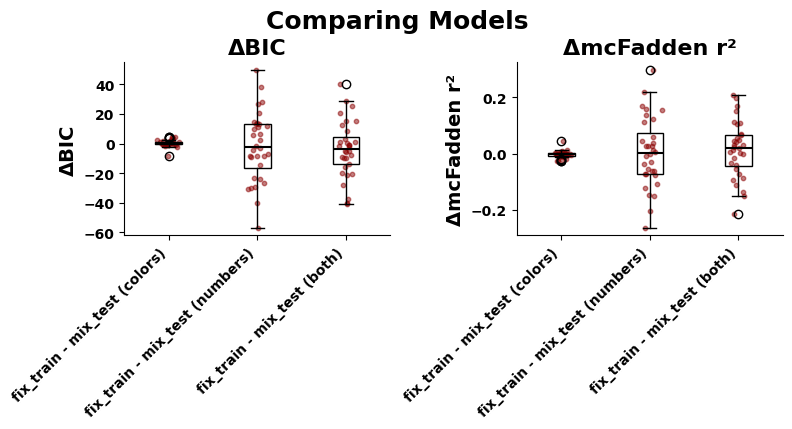

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

bic_deltas = [delta_bic_colors_fix_train_mix_test, delta_bic_numbers_fix_train_mix_test, delta_bic_colors_and_numbers_fix_train_mix_test]
mcFadden_r2_deltas = [delta_mcFadden_r2_colors_fix_train_mix_test, delta_mcFadden_r2_numbers_fix_train_mix_test, delta_mcFadden_r2_colors_and_numbers_fix_train_mix_test]

bic_labels = ["fix_train - mix_test (colors)", "fix_train - mix_test (numbers)", "fix_train - mix_test (both)"]
mcFadden_labels = ["fix_train - mix_test (colors)", "fix_train - mix_test (numbers)", "fix_train - mix_test (both)"]

box_bic = axs[0].boxplot(
    bic_deltas, vert=True, patch_artist=True, tick_labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

box_mcFadden = axs[1].boxplot(
    mcFadden_r2_deltas, vert=True, patch_artist=True, tick_labels=mcFadden_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

for box in box_bic['boxes']:
    box.set(facecolor='none')
for box in box_mcFadden['boxes']:
    box.set(facecolor='none')


scatter_colors = ['#8b0000', '#8b0000', '#8b0000']

for i, delta in enumerate(bic_deltas):
    axs[0].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[0].set_title("ΔBIC", fontsize=16, fontweight='bold')
axs[0].set_ylabel("ΔBIC", fontsize=14, fontweight='bold')

for i, delta in enumerate(mcFadden_r2_deltas):
    axs[1].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[1].set_title("ΔmcFadden r²", fontsize=16, fontweight='bold')
axs[1].set_ylabel("ΔmcFadden r²", fontsize=14, fontweight='bold')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axs:
    ax.tick_params(axis='y', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

axs[0].set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
axs[1].set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle('Comparing Models', fontsize=18, fontweight='bold', y=0.85)

plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison_bic_r2.pdf")
plt.savefig(filename, format='pdf')

plt.show()
